In [2]:
import tensorflow as tf
from tensorflow.python import keras
from sklearn.model_selection import train_test_split

2023-06-25 20:39:14.897623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 20:39:15.801843: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import json
import numpy as np

def load_data(dataset_path):
    with open(dataset_path,'r') as fp:
        data=json.load(fp)

    inputs=np.array(data['mfcc'])
    targets=np.array(data['labels'])

    return inputs,targets

In [4]:
inputs,targets=load_data('data_project.json')

In [5]:
targets

array([0, 0, 0, ..., 5, 5, 5])

In [6]:
input_train,input_test,target_train,target_test=train_test_split(inputs,targets,test_size=0.3)

In [7]:
inputs.shape

(5038, 259, 13)

In [8]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])

2023-06-25 20:39:25.908802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-25 20:39:26.014985: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-25 20:39:26.015182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3367)              0         
                                                                 
 dense (Dense)               (None, 512)               1724416   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,872,582
Trainable params: 1,872,582
Non-trainable params: 0
_________________________________________________________________


In [13]:
history=model.fit(input_train,target_train,validation_data=(input_test,target_test),epochs=100,batch_size=32)

Epoch 1/100
 11/111 [=>............................] - ETA: 0s - loss: 0.1030 - accuracy: 0.9659

2023-06-25 20:39:53.964543: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.
2023-06-25 20:39:54.043330: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47488168 exceeds 10% of free system memory.


111/111 [==============================] - 0s 4ms/step - loss: 0.1537 - accuracy: 0.9504 - val_loss: 2.8121 - val_accuracy: 0.5820
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 0.2020 - accuracy: 0.9359 - val_loss: 2.9705 - val_accuracy: 0.5767
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1602 - accuracy: 0.9467 - val_loss: 3.0280 - val_accuracy: 0.5734
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1386 - accuracy: 0.9543 - val_loss: 3.1474 - val_accuracy: 0.5754
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1980 - accuracy: 0.9370 - val_loss: 2.8677 - val_accuracy: 0.5747
Epoch 6/100
111/111 [==============================] - 0s 4ms/step - loss: 0.1232 - accuracy: 0.9597 - val_loss: 2.9182 - val_accuracy: 0.5794
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.9501 - val_loss: 3.5836 - val_accuracy: 0.5384
Epoch 8/100

Text(0.5, 0, 'Epochs')

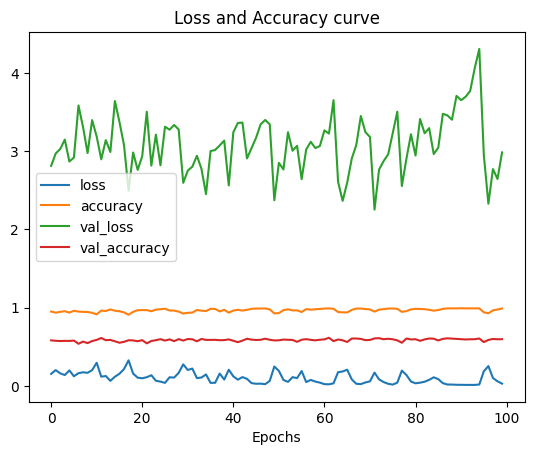

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

history_plot=pd.DataFrame(history.history)


history_plot.plot()
plt.title("Loss and Accuracy curve")
plt.xlabel("Epochs")

In [15]:
history_plot

,loss,accuracy,val_loss,val_accuracy
0,0.153681,0.950369,2.812124,0.582011
1,0.201965,0.935905,2.970543,0.576720
2,0.160170,0.946682,3.027953,0.573413
3,0.138607,0.954339,3.147429,0.575397
4,0.197985,0.937039,2.867670,0.574735
...,...,...,...,...
95,0.187089,0.940442,2.949980,0.560185
96,0.253589,0.928247,2.328537,0.587302
97,0.100787,0.965116,2.771129,0.599868
98,0.058831,0.976461,2.644546,0.595899
